### Regresión Logística

La regresión logística es un modelo estadístico utilizado para predecir la probabilidad de que ocurra un evento binario o categórico, como "sí/no", "positivo/negativo", o "aprobado/reprobado". Es ampliamente usada en problemas de clasificación, como el diagnóstico de enfermedades, detección de fraude, predicción de abandono de clientes, y más.

Dada una variable $y$ que sigue una distribución Bernoulli $B(p)$, se construye un modelo que modeliza $p(y=1)$ a partir de ciertas variables independientes, es decir, que modeliza $p(y=1|x_1,...,x_k)$.

El modelo estimado es de la forma $\hat{p}(y=1|x_1,...,x_k)=1/(1+e^{-(\hat{b_0}+\hat{b_1}·x_1+...+\hat{b_k}·x_k)})$. También es habitual trabajar con otras especificaciones equivalentes:
<ul>
<li>$\hat{logit}(y=1|x_1,...,x_k)=\hat{b_0}+\hat{b_1}·x_1+...+\hat{b_k}·x_k$
<li>$\hat{odds}(y=1|x_1,...,x_k)=\hat{p}(y=1|x_1,...,x_k)/\hat{p}(y=0|x_1,...,x_k)=e^{\hat{b_0}+\hat{b_1}·x_1+...+\hat{b_k}·x_k}$
</ul>

#### Importar paquetes 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc

#### Carga datos

In [10]:
titanic = pd.read_csv("C:/Users/pauri/OneDrive/Escritorio/Python projects/CUA Big Data/titanic (1).csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Ponemos la columna passengerID como índice

titanic.set_index("PassengerId",inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Descripción y visualización de los Datos

In [13]:
# Nombres variables

titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Descpritivos del DataFrame

titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

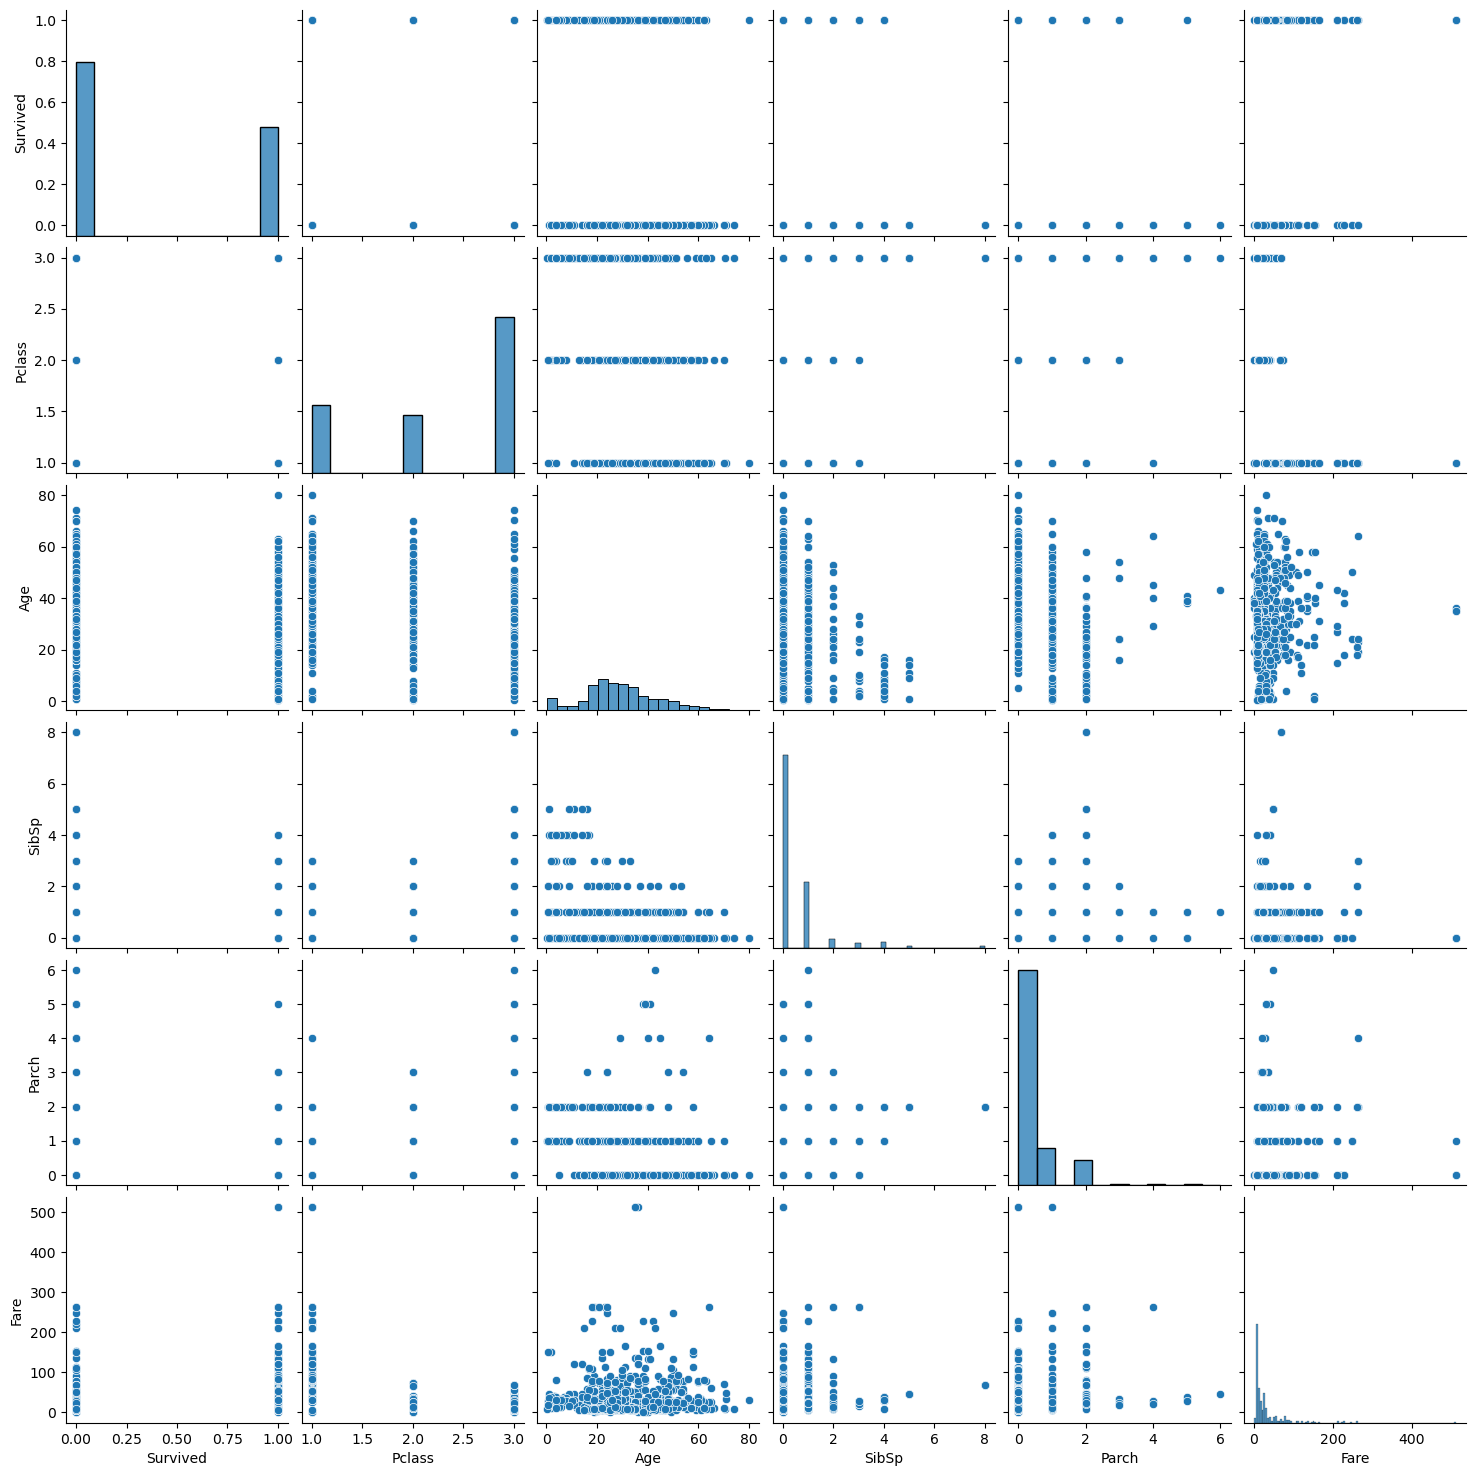

In [15]:
# Gtáficos bivariante de las variables. En la diagonal aparecen los histogramas de las variables.

sns.pairplot(titanic)
plt.show()

C:\Users\pauri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


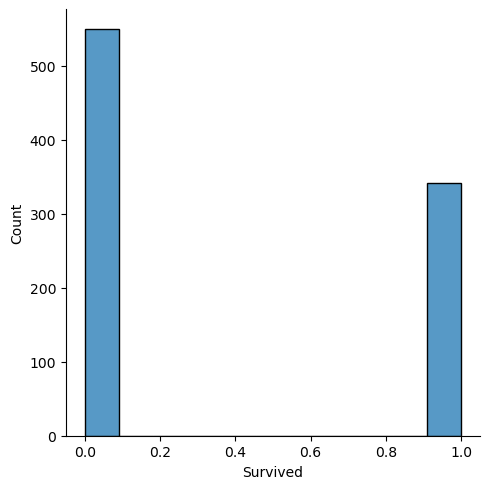

In [16]:
# Distribución de la variable Survived

sns.displot(titanic["Survived"])
plt.show()

In [17]:
# Correlación de las variables numéricas, para ver si hay dos independientes muy correladas

titanic[["Pclass","Age","SibSp","Parch","Fare"]].corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

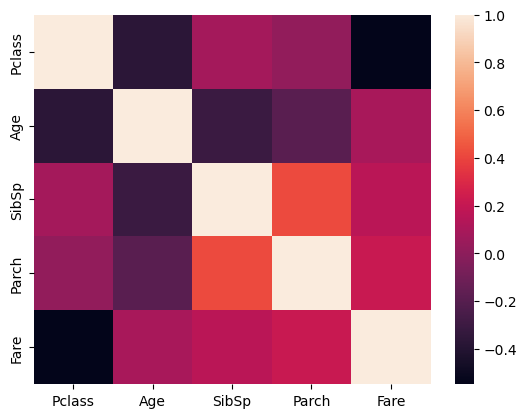

In [18]:
# Mapa de correlaciones

sns.heatmap(titanic[["Pclass","Age","SibSp","Parch","Fare"]].corr())

In [19]:
# Estudiamos si existen valores NA

titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
titanic.isnull().sum()/titanic.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

El 20% de los valors en Age son NA y el 77% de los valores en Cabin son NA. Para Afe la media es de 29.70 y la mediana 28; para Cabin, posiblemente tenemos demasiados NA, por lo que prescindimos de esta variable. Para Embarked vamos a eliminar los 2 valores NA existentes. En lugar de sustituir los NA de Age por 29,7 miramos si podemos hacer una imputación más detallada cruzando con otra variable categórica, como Pclass.

<Figure size 2000x1000 with 0 Axes>

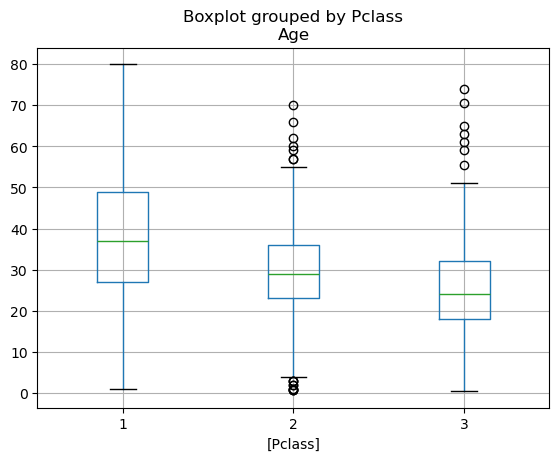

In [22]:
plt.figure(figsize=(20,10))
titanic[["Age","Pclass"]].boxplot(by="Pclass")
plt.show()

Sustituimos la variable Age por 38, 29 o 24 en función de si Pclass toma el valor 1, 2 o 3.

In [24]:
def imputar_edad(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass ==2 :
            return 29
        else: 
            return 24
    else:
        return Age

In [25]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(imputar_edad,axis=1)

C:\Users\pauri\AppData\Local\Temp\ipykernel_13424\1812427525.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\pauri\AppData\Local\Temp\ipykernel_13424\1812427525.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [26]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Ahora no queda ningún NA en Age. Eliminamos la variable Cabin y los NA de Embarked.

In [28]:
titanic.drop("Cabin",axis=1)
titanic.dropna(inplace=True)

In [29]:
titanic.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#### Transformación variables categóricas

Antes de estimar el modelo de regresión logistica es necesario transformar las variables categórcas a variables numéricas. Para ello, vamos a generar variables dummies que indiquen qué valor categórico de esas variables toman.

In [31]:
sex = pd.get_dummies(titanic["Sex"],drop_first=True)
embarked = pd.get_dummies(titanic["Embarked"],drop_first=True)

Como son variables booleanas, las transofmramos a binarias.

In [33]:
sex.male = sex.male*1
sex.male

PassengerId
2      0
4      0
7      1
11     0
12     0
      ..
872    0
873    1
880    0
888    0
890    1
Name: male, Length: 202, dtype: int32

In [34]:
embarked.Q = embarked.Q*1
embarked.S = embarked.S*1
embarked

,Q,S
PassengerId,,
2,0,0
4,0,1
7,0,1
11,0,1
12,0,1
...,...,...
872,0,1
873,0,1
880,0,0


Eliminamos también la variable ticket por ser un identificador único de los pasajeros.

In [36]:
titanic.drop(["Sex","Embarked","Name","Ticket","Cabin"],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embarked],axis=1)
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
PassengerId,,,,,,,,,
2,1,1,38.0,1,0,71.2833,0,0,0
4,1,1,35.0,1,0,53.1000,0,0,1
7,0,1,54.0,0,0,51.8625,1,0,1
11,1,3,4.0,1,1,16.7000,0,0,1
12,1,1,58.0,0,0,26.5500,0,0,1
...,...,...,...,...,...,...,...,...,...
872,1,1,47.0,1,1,52.5542,0,0,1
873,0,1,33.0,0,0,5.0000,1,0,1
880,1,1,56.0,0,1,83.1583,0,0,0


#### Estimación de la regresion logística

En primer lugar, es necesario seprar las variables indepndientes <b>X</b> de la variable dependiente <b>y</b>, y ademá separamos la muestra en un 70% para estimar el modelo y un 30% para evaluarlo.

In [38]:
X = titanic.drop("Survived",axis=1)
y = titanic["Survived"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123456789)

In [40]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

C:\Users\pauri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Obtenemos el intercepto y los coeficientes asociados a las variables
print(logit.intercept_)
logit.coef_

[4.23434045]


array([[-2.78780212e-01, -3.45095762e-02, -6.48207310e-02,
        -9.35430213e-02,  1.47511032e-04, -2.16770637e+00,
        -8.97224200e-01, -8.29665905e-01]])

El modelo estimado es:
$\hat{logit}=5.13492704-1.17498122·x_1-0.0442301598·x_2-0.394834223·x_3-0.0583588892·x_4+0.00228353896e·x_5-2.48139658·x_6+0.580828277·x_7-0.102123653·x_8$

$\hat{p}(y=1|Pclass,Pclass)=1/e^{-(5.13492704-1.17498122·x_1-0.0442301598·x_2-0.394834223·x_3-0.0583588892·x_4+0.00228353896e·x_5-2.48139658·x_6+0.580828277·x_7-0.102123653·x_8)}$

#### Evaluación del Modelo

In [44]:
predicciones_prob = logit.predict_proba(X_test)
predicciones_prob

array([[0.10866996, 0.89133004],
       [0.69505631, 0.30494369],
       [0.08689515, 0.91310485],
       [0.14422908, 0.85577092],
       [0.33176615, 0.66823385],
       [0.07815525, 0.92184475],
       [0.03494477, 0.96505523],
       [0.75807022, 0.24192978],
       [0.13808763, 0.86191237],
       [0.07172372, 0.92827628],
       [0.08252267, 0.91747733],
       [0.12674057, 0.87325943],
       [0.11921993, 0.88078007],
       [0.28851791, 0.71148209],
       [0.58552722, 0.41447278],
       [0.09326585, 0.90673415],
       [0.68952167, 0.31047833],
       [0.61947879, 0.38052121],
       [0.38204646, 0.61795354],
       [0.38796838, 0.61203162],
       [0.59485636, 0.40514364],
       [0.36553317, 0.63446683],
       [0.50763903, 0.49236097],
       [0.04668309, 0.95331691],
       [0.08871836, 0.91128164],
       [0.07684477, 0.92315523],
       [0.0425445 , 0.9574555 ],
       [0.64743735, 0.35256265],
       [0.39473144, 0.60526856],
       [0.15091141, 0.84908859],
       [0.

In [45]:
predicciones = logit.predict(X_test)
predicciones

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

Por último, calculamos la matriz de confusión, algunas métricas de evaluación habituales, y el coeficience <b>AUC</b> o <b>ROC</b> y el <b>gini</b>.

* accuaracy = (TP+TN)/(TP+TN+FP+FN)
* precision = TP/(TP+FP)
* recall (o sensivity) = TP/(TP+FN)
* AUC o AUROC o ROC es el área bajo la curva ROC, que ilustra la acumulación de TP y FP a medida que se acumula una puntuación (de mayor o menor probabilidad estimada)

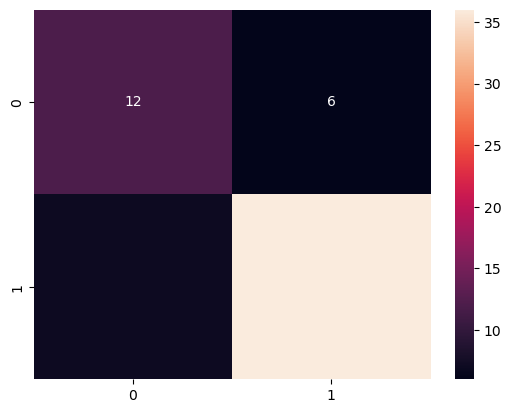

In [47]:
cm = confusion_matrix(y_test, predicciones)
sns.heatmap(cm, annot=True,fmt="d")
plt.show()

In [76]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        18
           1       0.86      0.84      0.85        43

    accuracy                           0.79        61
   macro avg       0.74      0.75      0.75        61
weighted avg       0.79      0.79      0.79        61



In [78]:
fpr,tpr,umbrales=roc_curve(y_test,predicciones_prob[:,1],pos_label=1)

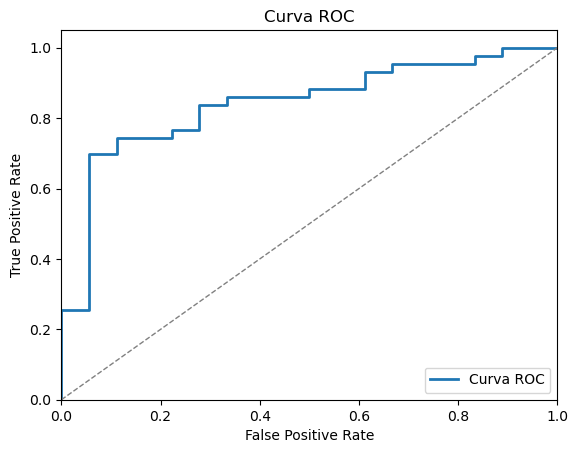

In [80]:
plt.figure()
lw = 2
plt.plot(fpr, tpr,
         lw=lw, label='Curva ROC')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [82]:
auc=auc(fpr, tpr)
auc

0.8423772609819121

In [84]:
roc=2*auc-1
roc

0.6847545219638242

El  modelo de regresión logística presenta un $AUC=ROC=0.86$. 